In [ ]:
# to use convolution operation between the 2 arrays 
import numpy as np

x = [2, 1, 0]
h = [3, 4, 5]

y = np.convolve(x, h)
y

array([ 6, 11, 14,  5,  0])

In [ ]:
print("Compare with the following values from Python: y[0] = {0} ; y[1] = {1}; y[2] = {2}; y[3] = {3}; y[4] = {4}".format(y[0], y[1], y[2], y[3], y[4])) 

Compare with the following values from Python: y[0] = 6 ; y[1] = 11; y[2] = 14; y[3] = 5; y[4] = 0


In [ ]:
x = [6, 2]
h = [1, 2, 5, 4]

y = np.convolve(x, h)
y

array([ 6, 14, 34, 34,  8])

In [ ]:
# "full"
x = [6, 2]
h = [1, 2, 5, 4]

y = np.convolve(x, h, "full") # now, because of the zero padding, the final dimension of the array is bigger
y

array([ 6, 14, 34, 34,  8])

In [ ]:
# "same"
x = [6, 2]
h = [1, 2, 5, 4]

y = np.convolve(x, h, "same") # it is same as zero padding, but with returns an output with the same length as max of x or h
y


array([ 6, 14, 34, 34])

In [ ]:
# "valid"
x = [6, 2]
h = [1, 2, 5, 4]

y = np.convolve(x, h, "valid") # valid returns output of length max(x, h) - min(x, h) + 1, no zero add
y

array([14, 34, 34])

In [ ]:
# without any parameter
x = [6, 2]
h = [1, 2, 5, 4]

y = np.convolve(x, h)
y

# results to full

array([ 6, 14, 34, 34,  8])

## Convolution: 2D operation with Python (Numpy/Scipy)

The 2D convolution operation is defined as:

<font size="4">$$ I'= \sum\limits_{u,v} I(x-u,y-v)g(u,v) $$ </font> 
 
 
Below we will apply the equation to an image represented by a 3x3 matrix according to the function g = (-1 1). Please note that when we apply the kernel we always use its inversion. 
 
$
I=
\begin{bmatrix}
     255          & 7      & 3     \\\\
     212          & 240    & 4     \\
     218          & 216    & 230
\end{bmatrix}
\\
$ 

$
g=
\begin{bmatrix}
     -1          & 1      
\end{bmatrix}
\\
$ 
  
$
\begin{bmatrix}
    \textbf{1}\cdot \textbf{0}      & \textbf{-1} \ast \textbf{255}  & 7      & 3     \\
    0              & 212          & 240    & 4     \\
    0              & 218          & 216    & 230
\end{bmatrix}
\rightarrow
\begin{bmatrix}
    \textbf{-255}  & 7      & 3     \\
    212            & 240    & 4     \\
    218            & 216    & 230
\end{bmatrix}
\\
$

$
\begin{bmatrix}
    \textbf{1}\ast \textbf{255}      & \textbf{-1} \ast \textbf{7}  & 3    \\
    212          & 240    & 4     \\
    218          & 216    & 230
\end{bmatrix}
\rightarrow
\begin{bmatrix}
    -255           & \textbf{248}      & 3     \\
    212            & 240    & 4     \\
    218            & 216    & 230
\end{bmatrix}
\\
$

$
\begin{bmatrix}
    255          & \textbf{1}\ast\textbf{7}  & \textbf{-1}\ast\textbf{3}    \\
    212          & 240    & 4     \\
    218          & 216    & 230
\end{bmatrix}
\rightarrow
\begin{bmatrix}
    -255           & 248      & \textbf{4}     \\
    212            & 240      & 4     \\
    218            & 216      & 230
\end{bmatrix}
\\
$

  
$
\begin{bmatrix}
    0              & 255          & 7          & 3     \\
    \textbf{1}\ast \textbf{0}    & \textbf{-1} \ast \textbf{212}  & 240     & 4     \\
    0              & 218          & 216    & 230
\end{bmatrix}
\rightarrow
\begin{bmatrix}
    \textbf{-255}  & 248    & 4     \\
    -212            & 240    & 4     \\
    218            & 216    & 230
\end{bmatrix}
\\
$
 
 


In [ ]:
from scipy import signal as sg
I = [ [255,   7,   3],
      [212, 240,   4],
      [218, 216, 230] ]

g = [[-1, 1]]

print('Without zero padding \n')

print(f"{sg.convolve(I, g, 'valid')}")
# the 'valid' argument states that the output consists only of those elements.
# that do not rely on the zero-padding

print("\n================")
print('\nWith zero padding\n')
print(sg.convolve(I, g))

Without zero padding 

[[248   4]
 [-28 236]
 [  2 -14]]


With zero padding

[[-255  248    4    3]
 [-212  -28  236    4]
 [-218    2  -14  230]]


For a more difficult case where h= [ [-1  1] , [2   3] ]

$
\begin{bmatrix}
    \textbf{3}\ast \textbf{0}      & \textbf{2} \ast \textbf{0}     & 0      & 0     \\\\
    \textbf{1}\ast \textbf{0}      & \textbf{-1} \ast \textbf{255}  & 7      & 3     \\
    0              & 212          & 240    & 4     \\
    0              & 218          & 216    & 230
\end{bmatrix}
\rightarrow
\begin{bmatrix}
    \textbf{-255}  & 7      & 3     \\
    212            & 240    & 4     \\
    218            & 216    & 230
\end{bmatrix}
\\
$


In [ ]:
from scipy import signal as sg

I = [[255, 7, 3],
     [212, 240, 4],
     [218, 216, 230]]

g = [[-1, 1],
     [2, 3]]

print('With zero padding \n')
print(sg.convolve(I, g, 'full'))
print('\n=====================\n')
# The output is the full discrete linear convolution of the inputs...
# It will use zero to complete the input matrix

print('With zero padding same\n')
print(sg.convolve(I, g, 'same'))
print('\n=====================\n')
# The output is the full discrete linear convolution of the inputs...
# It will use zero to complete the input matrix

print('Without zero padding \n')
print(sg.convolve(I, g, 'valid'))
# The 'valid' argument states that the output consists only of those elements...
# That do not rely on the zero padding


With zero padding 

[[-255  248    4    3]
 [ 298  751  263   13]
 [ 206 1118  714  242]
 [ 436 1086 1108  690]]


With zero padding same

[[-255  248    4]
 [ 298  751  263]
 [ 206 1118  714]]


Without zero padding 

[[ 751  263]
 [1118  714]]


## Coding with TensorFlow

In [ ]:
import tensorflow as tf
input = tf.Variable(tf.random.normal([1, 10, 10, 1]))
filter = tf.Variable(tf.random.normal([3, 3, 1, 1]))
op = tf.nn.conv2d(input, filter, strides=[1, 1, 1, 1], padding='VALID')
op2 = tf.nn.conv2d(input, filter, strides=[1, 1, 1, 1], padding='SAME')

print("Input \n")
print(f'{input.numpy()}')
print("\nFilter/Kernel \n")
print(filter.numpy())
print("\nResult/Feature Map with valid positions \n")
print(op.numpy())
print('\n')
print("Result/Feature Map with padding \n")
print(op2.numpy())

Input 

[[[[ 0.00840383]
   [ 0.06298803]
   [-0.36196518]
   [-0.24160519]
   [-0.1411083 ]
   [-0.61110884]
   [-0.42817974]
   [ 2.3974874 ]
   [ 0.8337416 ]
   [ 1.8044349 ]]

  [[ 0.39516574]
   [-0.28011498]
   [ 0.529468  ]
   [ 0.29206744]
   [ 1.839203  ]
   [ 1.0546404 ]
   [-1.8766646 ]
   [ 0.56250376]
   [ 0.24060258]
   [-0.55426353]]

  [[ 0.11209916]
   [ 1.3486307 ]
   [-0.6299378 ]
   [ 1.6125512 ]
   [ 1.3556542 ]
   [ 0.4718492 ]
   [ 0.00638279]
   [-0.7891018 ]
   [ 1.2506175 ]
   [-0.32358602]]

  [[ 0.57571334]
   [-0.27604434]
   [-0.04666188]
   [ 0.36117724]
   [ 0.3526742 ]
   [ 0.72236115]
   [ 0.6431749 ]
   [ 1.5297271 ]
   [-0.4218243 ]
   [ 0.33780882]]

  [[ 0.75464237]
   [ 0.43411276]
   [-1.421697  ]
   [ 0.35927415]
   [ 0.30901265]
   [-0.57910454]
   [ 1.1932504 ]
   [-2.3743181 ]
   [-0.7609994 ]
   [-0.45637172]]

  [[ 0.08014977]
   [-0.22049992]
   [ 0.78068125]
   [ 0.6848226 ]
   [ 1.4412619 ]
   [-0.04537663]
   [ 0.5859945 ]
   [ 0.580020

## Convolution applied on images

In [22]:
from google.colab import files
from IPython.display import Image

uploaded = files.upload()

Saving sampleswiss.jpg to sampleswiss.jpg


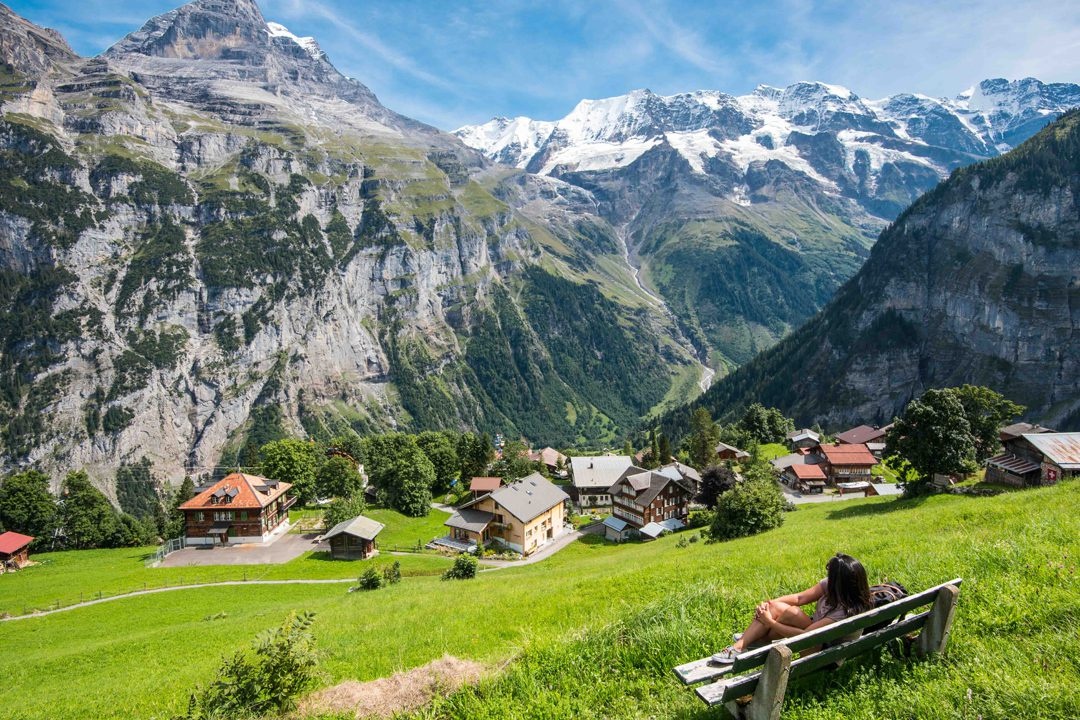

In [24]:
Image('sampleswiss.jpg',
      width = 500)

In [27]:
import numpy as np
from scipy import signal 
from scipy import misc
import matplotlib.pyplot as plt
from PIL import Image

im = Image.open('sampleswiss.jpg') # image's name


 Original type: <PIL.Image.Image image mode=L size=1080x720 at 0x7F420C16B2E0> 


After conversion to numerical representation 
 
 [[111 119 122 ... 192 192 192]
 [138 122 109 ... 191 191 191]
 [141 127 121 ... 191 191 191]
 ...
 [111 154 163 ... 115 137 161]
 [117 142 134 ... 104 113 127]
 [142 130 121 ... 119 121 138]]

 Input image converted to gray scale: 



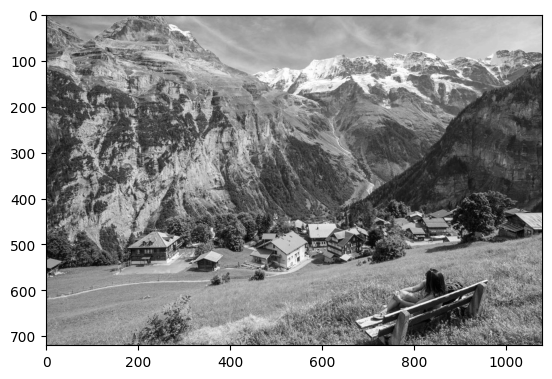

In [31]:
image_gr = im.convert("L") 
# convert("L") translate color images into black and white
# uses the ITU-R 601-2 Luma transform (there are several ways to convert an image to grey scale)

print("\n Original type: %r \n\n" % image_gr)

# convert image to a matrix with values from 0 to 255 (uint8)
arr = np.asarray(image_gr)
print(f'After conversion to numerical representation \n \n {arr}')

# Activating matplotlib for Ipython
%matplotlib inline

# Plot image
imgplot = plt.imshow(arr)
imgplot.set_cmap('gray') # can experiment diff color maps (Greys, winter, autumn)
print("\n Input image converted to gray scale: \n")
plt.show(imgplot)

### Experiment using an edge detector kernel.

In [37]:
kernel = np.array([[0, 1, 0],
                  [1, -4, 1],
                  [0, 1, 0]])

grad = signal.convolve2d(arr, kernel, mode='same', boundary='symm')

In [43]:
grad

array([[  35,   -2,  -22, ...,    0,   -1,   -1],
       [ -40,    5,   39, ...,    2,    1,    1],
       [ -71,    3,   21, ...,    1,    1,    1],
       ...,
       [  73,  -60,  -64, ...,    4,  -55, -132],
       [  44,  -33,    6, ...,   82,   37,   31],
       [ -37,   15,   41, ...,   41,    7,  -28]])

Gradient Magnitude - Feature map


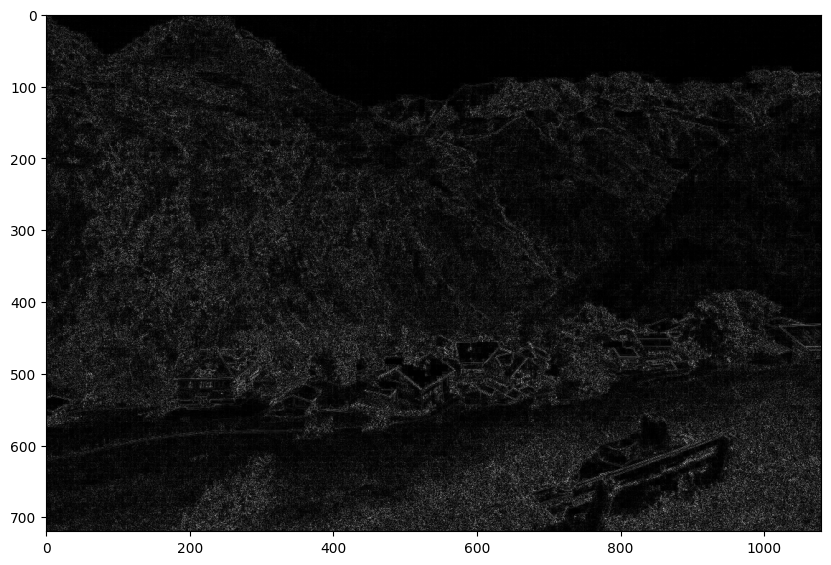

In [38]:
%matplotlib inline

print('Gradient Magnitude - Feature map')
fig, aux = plt.subplots(figsize=(10, 10))
aux.imshow(np.absolute(grad), cmap='gray')

if we change the kernel and start to analyze the outputs we would be acting as a CNN. The difference is that a Neural Network do all this work automatically (the kernel adjustment using different weights). In addition, we can understand how biases affect the behaviour of feature maps

Please note that when you are dealing with most of the real applications of CNNs, you usually convert the pixels values to a range from 0 to 1. This process is called **normalization**.


In [41]:
type(grad)

grad_biases = np.absolute(grad) + 100

grad_biases[grad_biases > 255] = 255

GRADIENT MAGNITUDE - Feature map


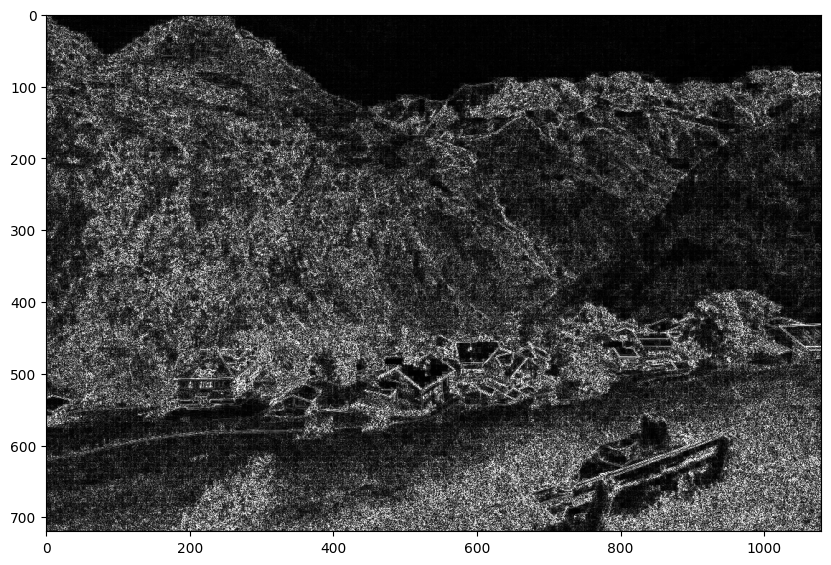

In [42]:
%matplotlib inline

print('GRADIENT MAGNITUDE - Feature map')
fig, aux = plt.subplots(figsize=(10, 10))
aux.imshow(np.absolute(grad_biases), cmap='gray')

## See how it works for a digit:

In [44]:
# download standard image
!wget --quiet https://ibm.box.com/shared/static/vvm1b63uvuxq88vbw9znpwu5ol380mco.jpg --output-document num3.jpg    

In [46]:
import numpy as np
from scipy import signal
from scipy import misc
import matplotlib.pyplot as plt
from PIL import Image

im = Image.open('num3.jpg')


 Original type: <PIL.Image.Image image mode=L size=181x181 at 0x7F41FFC3F760> 


After conversion to numerical representation: 

 [[26 14 12 ... 11 11 11]
 [ 0  0  1 ...  0  0  0]
 [12  1  0 ...  0  0  0]
 ...
 [12  0  0 ...  0  0  0]
 [12  0  0 ...  0  0  0]
 [12  0  0 ...  0  0  0]]

 Input image converted to gray scale: 



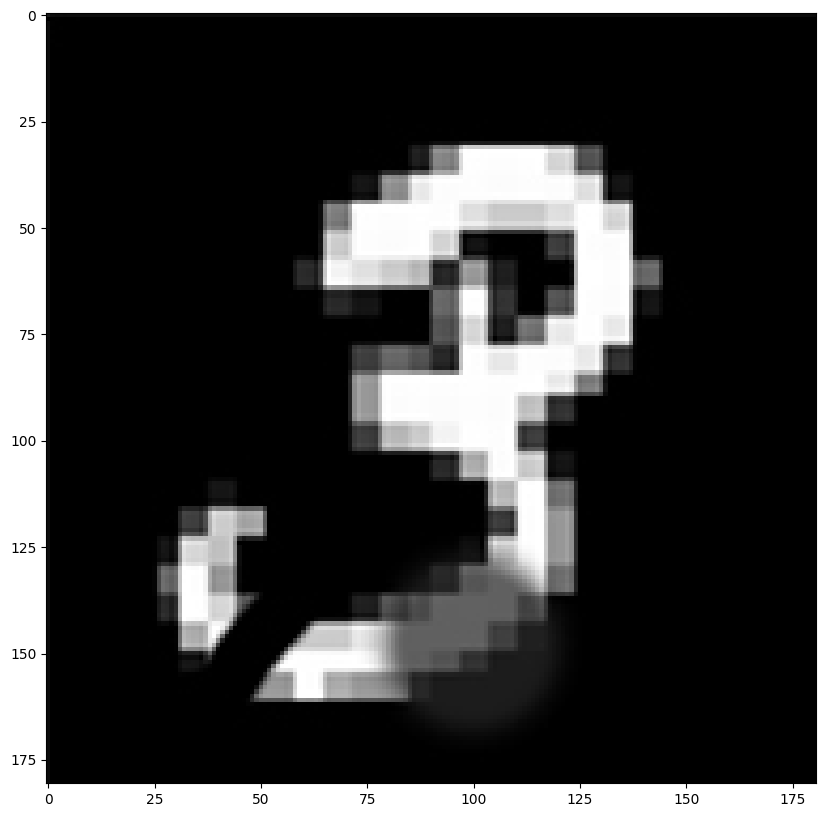

In [48]:
image_gr = im.convert("L")

print("\n Original type: %r \n\n" % image_gr)

# convert image to a matrix with values from 0 to 255 (uint8)
arr = np.asarray(image_gr)
print(f"After conversion to numerical representation: \n\n {arr}")

# Activating matplotlib for Ipython
%matplotlib inline

# Plot image
fig, aux = plt.subplots(figsize=(10, 10))
imgplot = plt.imshow(arr)
imgplot.set_cmap('gray')
print("\n Input image converted to gray scale: \n")
plt.show(imgplot)

Now, we will experiment using an edge detector kernel.


GRADIENT MAGNITUDE - Feature map


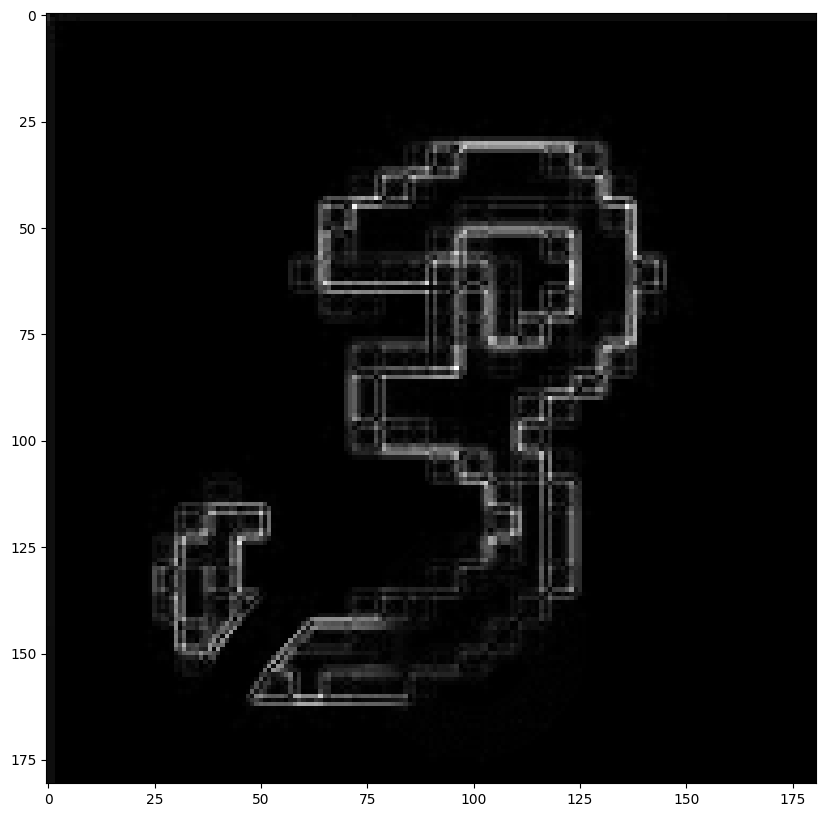

In [49]:
kernel = np.array([[0, 1, 0],
                   [1, -4, 1],
                   [0, 1, 0]])

grad = signal.convolve2d(arr, kernel, mode='same', boundary='symm')
%matplotlib inline

print('GRADIENT MAGNITUDE - Feature map')

fig, aux = plt.subplots(figsize = (10, 10))
aux.imshow(np.absolute(grad), cmap='gray')